Let us first import the required python libraries for our project.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

The CSV is loaded into google drive and can be accessed here. Let us load the CSV into our project.

In [ ]:
df = pd.read_csv('METABRIC_RNA_Mutation.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df2 = df.iloc[:, 0:31]

df2.head()


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [ ]:
missing_df = pd.DataFrame(df2.apply(lambda x:round((x.isna().sum() * 100)/len(df2), 3), axis = 0)).reset_index().rename(columns = {'index':'column_name'
, 0:'percent_of_nulls'}).sort_values(by = 'percent_of_nulls', ascending = False)

missing_df

,column_name,percent_of_nulls
29,tumor_stage,26.313
27,3-gene_classifier_subtype,10.714
18,primary_tumor_laterality,5.567
11,neoplasm_histologic_grade,3.782
5,cellularity,2.836
20,mutation_count,2.363
9,er_status_measured_by_ihc,1.576
2,type_of_breast_surgery,1.155
28,tumor_size,1.050
4,cancer_type_detailed,0.788


In [ ]:
cols_to_be_removed = ["cancer_type_detailed", "patient_id", "cancer_type", "cohort", "oncotree_code", "overall_survival_months",
                       "3-gene_classifier_subtype", "er_status_measured_by_ihc", "her2_status_measured_by_snp6", "tumor_stage"]

for col in cols_to_be_removed:
  del df2[col]

df2

,age_at_diagnosis,type_of_breast_surgery,cellularity,chemotherapy,pam50_+_claudin-low_subtype,er_status,neoplasm_histologic_grade,her2_status,tumor_other_histologic_subtype,hormone_therapy,...,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival,pr_status,radio_therapy,tumor_size,death_from_cancer
0,75.65,MASTECTOMY,NaN,0,claudin-low,Positive,3.0,Negative,Ductal/NST,1,...,4ER+,Right,10.0,NaN,6.044,1,Negative,1,22.0,Living
1,43.19,BREAST CONSERVING,High,0,LumA,Positive,3.0,Negative,Ductal/NST,1,...,4ER+,Right,0.0,2.0,4.020,1,Positive,1,10.0,Living
2,48.87,MASTECTOMY,High,1,LumB,Positive,2.0,Negative,Ductal/NST,1,...,3,Right,1.0,2.0,4.030,0,Positive,0,15.0,Died of Disease
3,47.68,MASTECTOMY,Moderate,1,LumB,Positive,2.0,Negative,Mixed,1,...,9,Right,3.0,1.0,4.050,1,Positive,1,25.0,Living
4,76.97,MASTECTOMY,High,1,LumB,Positive,3.0,Negative,Mixed,1,...,9,Right,8.0,2.0,6.080,0,Positive,1,40.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43.10,BREAST CONSERVING,High,0,LumA,Positive,3.0,Negative,Lobular,1,...,3,Right,1.0,4.0,5.050,1,Positive,1,25.0,Living
1900,42.88,MASTECTOMY,High,0,LumB,Positive,3.0,Positive,Ductal/NST,0,...,5,NaN,1.0,6.0,5.040,0,Negative,1,20.0,Died of Disease
1901,62.90,MASTECTOMY,High,0,LumB,Positive,3.0,Negative,Ductal/NST,1,...,1,Left,45.0,4.0,6.050,0,Positive,1,25.0,Died of Disease
1902,61.16,MASTECTOMY,Moderate,0,LumB,Positive,2.0,Negative,Ductal/NST,1,...,1,NaN,12.0,15.0,5.050,0,Positive,0,25.0,Died of Other Causes


In [ ]:
df2.shape

(715, 21)

In [ ]:
df2['tumor_size'] = np.log10(df2['tumor_size'])

df2['mutation_count'] = np.log10(df2['mutation_count'])

In [ ]:
categorical_cols = ["tumor_other_histologic_subtype", "pam50_+_claudin-low_subtype", "type_of_breast_surgery", "cellularity",
                    "chemotherapy", "er_status", "neoplasm_histologic_grade", "her2_status", "hormone_therapy", "inferred_menopausal_state",
                    "integrative_cluster", "primary_tumor_laterality", "pr_status", "radio_therapy", "overall_survival"]

list_temp = {}
df_temp = pd.DataFrame()
for col in categorical_cols:
  list_temp[col] = dict(df2.loc[:, col].value_counts())

In [ ]:
no_of_cats_df2 = pd.concat({
        k: pd.DataFrame.from_dict(v, 'index') for k, v in list_temp.items()
    },
    axis=0)

no_of_cats_df2['perc_of_vals_0'] = (no_of_cats_df2.iloc[:, 0]/df2.shape[0]) * 100

no_of_cats_df2

0  perc_of_vals_0
tumor_other_histologic_subtype Ductal/NST           1454       76.365546
                               Mixed                 207       10.871849
                               Lobular               142        7.457983
                               Medullary              25        1.313025
                               Mucinous               22        1.155462
                               Tubular/ cribriform    21        1.102941
                               Other                  17        0.892857
                               Metaplastic             1        0.052521
pam50_+_claudin-low_subtype    LumA                  679       35.661765
                               LumB                  461       24.212185
                               Her2                  220       11.554622
                               claudin-low           199       10.451681
                               Basal                 199       10.451681
                               Normal                140        7.352941
                               NC                      6        0.315126
type_of_breast_surgery         MASTECTOMY           1127       59.191176
                               BREAST CONSERVING     755       39.653361
cellularity                    High                  939       49.317227
                               Moderate              711       37.342437
                               Low                   200       10.504202
chemotherapy                   0                    1508       79.201681
                               1                     396       20.798319
er_status                      Positive             1459       76.628151
                               Negative              445       23.371849
neoplasm_histologic_grade      3.0                   927       48.686975
                               2.0                   740       38.865546
                               1                     165        8.665966
her2_status                    Negative             1668       87.605042
                               Positive              236       12.394958
hormone_therapy                1                    1174       61.659664
                               0                     730       38.340336
inferred_menopausal_state      Post                 1493       78.413866
                               Pre                   411       21.586134
integrative_cluster            8                     289       15.178571
                               3                     282       14.810924
                               4ER+                  244       12.815126
                               10                    219       11.502101
                               5                     184        9.663866
                               7                     182        9.558824
                               9                     142        7.457983
                               1                     132        6.932773
                               6                      84        4.411765
                               4ER-                   74        3.886555
                               2                      72        3.781513
primary_tumor_laterality       Left                  935       49.107143
                               Right                 863       45.325630
pr_status                      Positive             1009       52.993697
                               Negative              895       47.006303
radio_therapy                  1                    1137       59.716387
                               0                     767       40.283613
overall_survival               0                    1103       57.930672
                               1                     801       42.069328

In [ ]:
df2 = df2[df2['tumor_other_histologic_subtype'] != ('Other')]

df2 = df2[df2['pam50_+_claudin-low_subtype']	!= ('NC')]

df2 = df2[df2['death_from_cancer'] != ('Died of Other Causes')]

In [ ]:
df2['er_status'] = df2['er_status'].replace(['Positive', 'Negative'], [1, 0])

df2['her2_status'] = df2['her2_status'].replace(['Positive', 'Negative'], [1, 0])

df2['pr_status'] = df2['pr_status'].replace(['Positive', 'Negative'], [1, 0])

In [ ]:
df2.shape

(1405, 21)

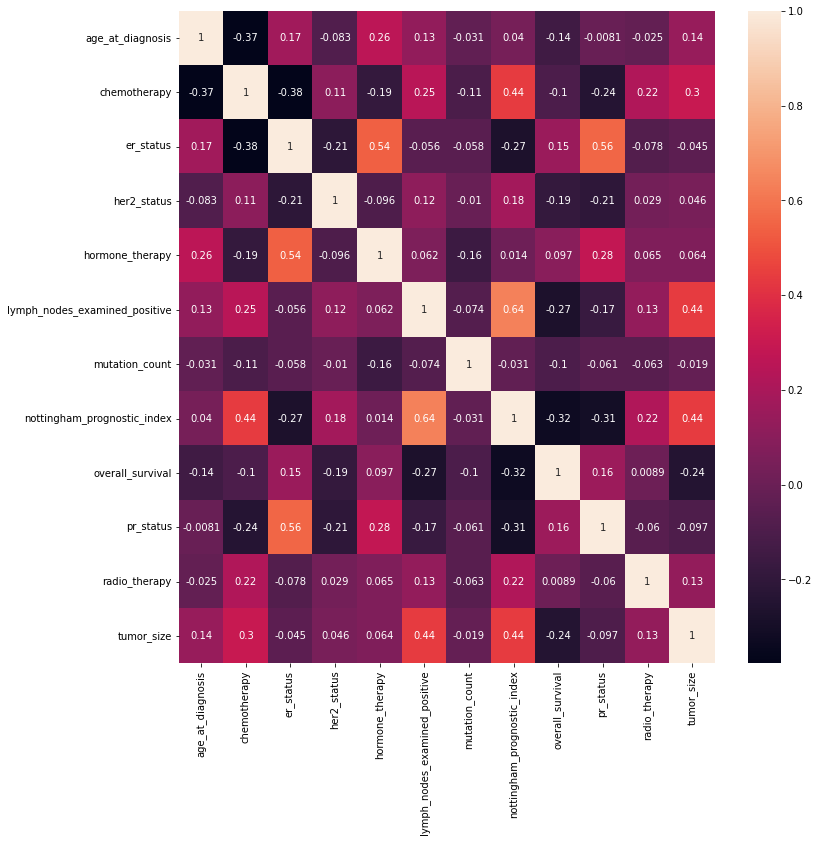

In [ ]:

 plt.figure(figsize = (12, 12))
 sns.heatmap(df2.loc[:, [x for x in df2.columns if df2[x].dtype in (['float64', 'int64'])]].corr(), annot = True)
 plt.show();


In [ ]:
df2 = df2.dropna(how = 'any', axis = 0)

In [ ]:
df2.shape

(499, 21)

In [ ]:
ohe = OneHotEncoder()

# feature_array = ohe.fit_transform(df2[["tumor_other_histologic_subtype", "pam50_+_claudin-low_subtype", "type_of_breast_surgery", "cellularity",
#                                        "er_status", "neoplasm_histologic_grade", "her2_status", "inferred_menopausal_state",
#                                        "integrative_cluster", "primary_tumor_laterality", "pr_status"]]).toarray()

feature_array = ohe.fit_transform(df2[["tumor_other_histologic_subtype", "pam50_+_claudin-low_subtype", "type_of_breast_surgery", "cellularity",
                                       "neoplasm_histologic_grade", "inferred_menopausal_state", "integrative_cluster", "primary_tumor_laterality"]]).toarray()


feature_array


array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [ ]:
pd.DataFrame(feature_array)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1198,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
feature_labels = []

for i in ohe.categories_:
  for j in i:
    feature_labels.append(j)

print(ohe.categories_)


[array(['Ductal/NST', 'Lobular', 'Medullary', 'Mixed', 'Mucinous',
       'Tubular/ cribriform'], dtype=object), array(['Basal', 'Her2', 'LumA', 'LumB', 'Normal', 'claudin-low'],
      dtype=object), array(['BREAST CONSERVING', 'MASTECTOMY'], dtype=object), array(['High', 'Low', 'Moderate'], dtype=object), array([1., 2., 3.]), array(['Post', 'Pre'], dtype=object), array(['1', '10', '2', '3', '4ER+', '4ER-', '5', '6', '7', '8', '9'],
      dtype=object), array(['Left', 'Right'], dtype=object)]


In [ ]:
for i in range(6):
  feature_labels[i] = "tumor_other_histologic_subtype_" + feature_labels[i]

for i in range(6, 12):
  feature_labels[i] = "pam50_+_claudin-low_subtype_" + feature_labels[i]

for i in range(12, 14):
  feature_labels[i] = "type_of_breast_surgery_" + feature_labels[i]

for i in range(14, 17):
  feature_labels[i] = "cellularity_" + feature_labels[i]

for i in range(17, 20):
  feature_labels[i] = "neoplasm_histologic_grade_" + str(feature_labels[i])

for i in range(20, 22):
  feature_labels[i] = "inferred_menopausal_state_" + feature_labels[i]

for i in range(22, 33):
  feature_labels[i] = "integrative_cluster_" + feature_labels[i]

for i in range(33, 35):
  feature_labels[i] = "primary_tumor_laterality_" + feature_labels[i]

feature_labels

['tumor_other_histologic_subtype_Ductal/NST',
 'tumor_other_histologic_subtype_Lobular',
 'tumor_other_histologic_subtype_Medullary',
 'tumor_other_histologic_subtype_Mixed',
 'tumor_other_histologic_subtype_Mucinous',
 'tumor_other_histologic_subtype_Tubular/ cribriform',
 'pam50_+_claudin-low_subtype_Basal',
 'pam50_+_claudin-low_subtype_Her2',
 'pam50_+_claudin-low_subtype_LumA',
 'pam50_+_claudin-low_subtype_LumB',
 'pam50_+_claudin-low_subtype_Normal',
 'pam50_+_claudin-low_subtype_claudin-low',
 'type_of_breast_surgery_BREAST CONSERVING',
 'type_of_breast_surgery_MASTECTOMY',
 'cellularity_High',
 'cellularity_Low',
 'cellularity_Moderate',
 'neoplasm_histologic_grade_1.0',
 'neoplasm_histologic_grade_2.0',
 'neoplasm_histologic_grade_3.0',
 'inferred_menopausal_state_Post',
 'inferred_menopausal_state_Pre',
 'integrative_cluster_1',
 'integrative_cluster_10',
 'integrative_cluster_2',
 'integrative_cluster_3',
 'integrative_cluster_4ER+',
 'integrative_cluster_4ER-',
 'integrati

In [ ]:
feature_df = pd.DataFrame(feature_array, columns = feature_labels)

feature_df.describe(include = 'all')

,tumor_other_histologic_subtype_Ductal/NST,tumor_other_histologic_subtype_Lobular,tumor_other_histologic_subtype_Medullary,tumor_other_histologic_subtype_Mixed,tumor_other_histologic_subtype_Mucinous,tumor_other_histologic_subtype_Tubular/ cribriform,pam50_+_claudin-low_subtype_Basal,pam50_+_claudin-low_subtype_Her2,pam50_+_claudin-low_subtype_LumA,pam50_+_claudin-low_subtype_LumB,...,integrative_cluster_3,integrative_cluster_4ER+,integrative_cluster_4ER-,integrative_cluster_5,integrative_cluster_6,integrative_cluster_7,integrative_cluster_8,integrative_cluster_9,primary_tumor_laterality_Left,primary_tumor_laterality_Right
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,...,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,0.787022,0.070715,0.014975,0.103161,0.012479,0.011647,0.121464,0.119800,0.340266,0.242928,...,0.127288,0.121464,0.038270,0.111481,0.042429,0.088186,0.142263,0.071547,0.513311,0.486689
std,0.409583,0.256456,0.121503,0.304296,0.111057,0.107337,0.326802,0.324863,0.473996,0.429031,...,0.333434,0.326802,0.191926,0.314858,0.201650,0.283684,0.349465,0.257844,0.500031,0.500031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df3 = df2

cat_cols = ["tumor_other_histologic_subtype", "pam50_+_claudin-low_subtype", "type_of_breast_surgery", "cellularity",
            "neoplasm_histologic_grade", "inferred_menopausal_state",
            "integrative_cluster", "primary_tumor_laterality", "death_from_cancer"]

for col in cat_cols:
  del df3[col]

df3.head()

,age_at_diagnosis,chemotherapy,er_status,her2_status,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival,pr_status,radio_therapy,tumor_size
1,43.19,0,1,0,1,0.0,0.30103,4.020,1,1,1,1.000000
2,48.87,1,1,0,1,1.0,0.30103,4.030,0,1,0,1.176091
3,47.68,1,1,0,1,3.0,0.00000,4.050,1,1,1,1.397940
4,76.97,1,1,0,1,8.0,0.30103,6.080,0,1,1,1.602060
5,78.77,0,1,0,1,0.0,0.60206,4.062,0,1,1,1.491362


Use the below data frame for feature selection.

In [ ]:
feature_df

,tumor_other_histologic_subtype_Ductal/NST,tumor_other_histologic_subtype_Lobular,tumor_other_histologic_subtype_Medullary,tumor_other_histologic_subtype_Mixed,tumor_other_histologic_subtype_Mucinous,tumor_other_histologic_subtype_Tubular/ cribriform,pam50_+_claudin-low_subtype_Basal,pam50_+_claudin-low_subtype_Her2,pam50_+_claudin-low_subtype_LumA,pam50_+_claudin-low_subtype_LumB,...,integrative_cluster_3,integrative_cluster_4ER+,integrative_cluster_4ER-,integrative_cluster_5,integrative_cluster_6,integrative_cluster_7,integrative_cluster_8,integrative_cluster_9,primary_tumor_laterality_Left,primary_tumor_laterality_Right
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1198,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df3.shape

(1202, 12)

In [ ]:
feature_df.shape

(1202, 35)

In [ ]:
df3.reset_index(drop = True, inplace = True)

feature_df.reset_index(drop = True, inplace = True)

In [ ]:
df4 = pd.concat([df3, feature_df], axis = 1)

In [ ]:
df4.shape

(1202, 47)

In [ ]:
df4.isna().sum()

age_at_diagnosis                                      0
chemotherapy                                          0
er_status                                             0
her2_status                                           0
hormone_therapy                                       0
lymph_nodes_examined_positive                         0
mutation_count                                        0
nottingham_prognostic_index                           0
overall_survival                                      0
pr_status                                             0
radio_therapy                                         0
tumor_size                                            0
tumor_other_histologic_subtype_Ductal/NST             0
tumor_other_histologic_subtype_Lobular                0
tumor_other_histologic_subtype_Medullary              0
tumor_other_histologic_subtype_Mixed                  0
tumor_other_histologic_subtype_Mucinous               0
tumor_other_histologic_subtype_Tubular/ cribrifo

In [ ]:
#df4 = df4.drop(columns = 'index')

In [ ]:
#df4.to_csv('METABRIC_Cleaned_Encoded_Updated_2.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [ ]:
X = df4.loc[:, df4.columns != 'overall_survival']
y = df4['overall_survival']

In [ ]:
X.shape

(499, 46)

In [ ]:
y.shape

(499,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [ ]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
forward_feature_selection2 = SFS(RandomForestClassifier(n_jobs = -1),
                                                      k_features = (1,46),
                                                      forward = True,
                                                      floating = False,
                                                      verbose = 2,
                                                      scoring = "accuracy",
                                                      cv = 5
                                                      ).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

KeyError: ignored

In [ ]:
features = forward_feature_selection2.k_feature_names_

features


('age_at_diagnosis',
 'her2_status',
 'hormone_therapy',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'tumor_size',
 'tumor_other_histologic_subtype_Ductal/NST',
 'tumor_other_histologic_subtype_Lobular',
 'tumor_other_histologic_subtype_Medullary',
 'tumor_other_histologic_subtype_Mixed',
 'tumor_other_histologic_subtype_Mucinous',
 'tumor_other_histologic_subtype_Tubular/ cribriform',
 'pam50_+_claudin-low_subtype_Her2',
 'pam50_+_claudin-low_subtype_LumA',
 'pam50_+_claudin-low_subtype_Normal',
 'pam50_+_claudin-low_subtype_claudin-low',
 'type_of_breast_surgery_BREAST CONSERVING',
 'type_of_breast_surgery_MASTECTOMY',
 'cellularity_High',
 'cellularity_Low',
 'cellularity_Moderate',
 'neoplasm_histologic_grade_1.0',
 'neoplasm_histologic_grade_3.0',
 'inferred_menopausal_state_Post',
 'integrative_cluster_10',
 'integrative_cluster_2',
 'integrative_cluster_3',
 'integrative_cluster_4ER-',
 'integrative_cluster_5',
 'integrative_cluster_6',
 'integrative_cluster_7',
 'prim

In [ ]:
features2 = ['age_at_diagnosis',
 'her2_status',
 'hormone_therapy',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'tumor_size',
 'tumor_other_histologic_subtype_Ductal/NST',
 'tumor_other_histologic_subtype_Lobular',
 'tumor_other_histologic_subtype_Medullary',
 'tumor_other_histologic_subtype_Mixed',
 'tumor_other_histologic_subtype_Mucinous',
 'tumor_other_histologic_subtype_Tubular/ cribriform',
 'pam50_+_claudin-low_subtype_Her2',
 'pam50_+_claudin-low_subtype_LumA',
 'pam50_+_claudin-low_subtype_Normal',
 'pam50_+_claudin-low_subtype_claudin-low',
 'type_of_breast_surgery_BREAST CONSERVING',
 'type_of_breast_surgery_MASTECTOMY',
 'cellularity_High',
 'cellularity_Low',
 'cellularity_Moderate',
 'neoplasm_histologic_grade_1.0',
 'neoplasm_histologic_grade_3.0',
 'inferred_menopausal_state_Post',
 'integrative_cluster_10',
 'integrative_cluster_2',
 'integrative_cluster_3',
 'integrative_cluster_4ER-',
 'integrative_cluster_5',
 'integrative_cluster_6',
 'integrative_cluster_7',
 'primary_tumor_laterality_Right']

In [ ]:
forward_feature_selection2.k_score_

0.6792326580724372

In [ ]:
pd.DataFrame.from_dict(forward_feature_selection2.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[0.6464088397790055, 0.6111111111111112, 0.572...",0.601504,"(lymph_nodes_examined_positive,)",0.03757,0.02923,0.014615
2,"(5, 23)","[0.6629834254143646, 0.6444444444444445, 0.666...",0.644819,"(lymph_nodes_examined_positive, type_of_breast...",0.023052,0.017936,0.008968
3,"(5, 23, 35)","[0.6519337016574586, 0.6666666666666666, 0.672...",0.648165,"(lymph_nodes_examined_positive, type_of_breast...",0.026636,0.020724,0.010362
4,"(5, 23, 35, 38)","[0.6685082872928176, 0.6722222222222223, 0.672...",0.653702,"(lymph_nodes_examined_positive, type_of_breast...",0.032703,0.025444,0.012722
5,"(5, 23, 35, 38, 40)","[0.6629834254143646, 0.6666666666666666, 0.7, ...",0.657041,"(lymph_nodes_examined_positive, type_of_breast...",0.039296,0.030574,0.015287
6,"(5, 15, 23, 35, 38, 40)","[0.6408839779005525, 0.6611111111111111, 0.7, ...",0.65151,"(lymph_nodes_examined_positive, tumor_other_hi...",0.039282,0.030563,0.015281
7,"(5, 15, 16, 23, 35, 38, 40)","[0.6464088397790055, 0.6666666666666666, 0.711...",0.655948,"(lymph_nodes_examined_positive, tumor_other_hi...",0.043865,0.034128,0.017064
8,"(5, 15, 16, 23, 24, 35, 38, 40)","[0.6408839779005525, 0.6666666666666666, 0.711...",0.654843,"(lymph_nodes_examined_positive, tumor_other_hi...",0.044351,0.034506,0.017253
9,"(5, 13, 15, 16, 23, 24, 35, 38, 40)","[0.6408839779005525, 0.6722222222222223, 0.7, ...",0.650399,"(lymph_nodes_examined_positive, tumor_other_hi...",0.041961,0.032647,0.016324
10,"(5, 13, 15, 16, 23, 24, 27, 35, 38, 40)","[0.6298342541436464, 0.65, 0.6944444444444444,...",0.650411,"(lymph_nodes_examined_positive, tumor_other_hi...",0.037124,0.028883,0.014442


In [ ]:
# Hyperparameter Tuning

# Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

#Number of festures to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in a tree
max_depth = [2, 4]

#Minimum number of samples required to split a node
min_samples_split = [2, 5]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

#Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
#Create the parameter grid

parameter_grid = { 'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'bootstrap': bootstrap }

In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid= parameter_grid, cv = 3, verbose = 2, n_jobs  = 4)

In [ ]:
X_train.shape

(901, 46)

In [ ]:
X_test.shape

(301, 46)

In [ ]:
X_train = X_train.loc[:, features2]

X_test = X_test.loc[:, features2]

In [ ]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 48}

In [ ]:
rf_Grid.score(X_test, y_test)

0.7142857142857143

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
predictions = rf_Grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 71  52]
 [ 34 144]]


              precision    recall  f1-score   support

           0       0.68      0.58      0.62       123
           1       0.73      0.81      0.77       178

    accuracy                           0.71       301
   macro avg       0.71      0.69      0.70       301
weighted avg       0.71      0.71      0.71       301



In [ ]:
y_pred_proba = rf_Grid.predict_proba(X_test)[::,1]

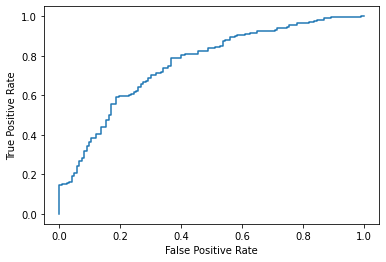

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(fpr)

[0.         0.         0.         0.00813008 0.00813008 0.02439024
 0.02439024 0.03252033 0.03252033 0.04065041 0.04065041 0.04878049
 0.04878049 0.05691057 0.05691057 0.06504065 0.06504065 0.07317073
 0.07317073 0.08130081 0.08130081 0.08943089 0.08943089 0.09756098
 0.09756098 0.10569106 0.10569106 0.12195122 0.12195122 0.13821138
 0.13821138 0.15447154 0.15447154 0.16260163 0.16260163 0.17073171
 0.17073171 0.18699187 0.18699187 0.19512195 0.19512195 0.22764228
 0.22764228 0.23577236 0.23577236 0.24390244 0.24390244 0.25203252
 0.25203252 0.2601626  0.2601626  0.26829268 0.26829268 0.27642276
 0.27642276 0.28455285 0.28455285 0.29268293 0.29268293 0.30081301
 0.30081301 0.31707317 0.31707317 0.33333333 0.33333333 0.34146341
 0.34146341 0.35772358 0.35772358 0.36585366 0.36585366 0.39837398
 0.39837398 0.41463415 0.41463415 0.45528455 0.45528455 0.48780488
 0.48780488 0.51219512 0.51219512 0.52845528 0.52845528 0.53658537
 0.53658537 0.54471545 0.54471545 0.56097561 0.56097561 0.5772

In [ ]:
fpr.tolist()

[0.0,
 0.0,
 0.0,
 0.008130081300813009,
 0.008130081300813009,
 0.024390243902439025,
 0.024390243902439025,
 0.032520325203252036,
 0.032520325203252036,
 0.04065040650406504,
 0.04065040650406504,
 0.04878048780487805,
 0.04878048780487805,
 0.056910569105691054,
 0.056910569105691054,
 0.06504065040650407,
 0.06504065040650407,
 0.07317073170731707,
 0.07317073170731707,
 0.08130081300813008,
 0.08130081300813008,
 0.08943089430894309,
 0.08943089430894309,
 0.0975609756097561,
 0.0975609756097561,
 0.10569105691056911,
 0.10569105691056911,
 0.12195121951219512,
 0.12195121951219512,
 0.13821138211382114,
 0.13821138211382114,
 0.15447154471544716,
 0.15447154471544716,
 0.16260162601626016,
 0.16260162601626016,
 0.17073170731707318,
 0.17073170731707318,
 0.18699186991869918,
 0.18699186991869918,
 0.1951219512195122,
 0.1951219512195122,
 0.22764227642276422,
 0.22764227642276422,
 0.23577235772357724,
 0.23577235772357724,
 0.24390243902439024,
 0.24390243902439024,
 0.2520325

In [ ]:
print(tpr)

[0.         0.00561798 0.14606742 0.14606742 0.15168539 0.15168539
 0.15730337 0.15730337 0.16292135 0.16292135 0.19101124 0.19101124
 0.20786517 0.20786517 0.24157303 0.24157303 0.26966292 0.26966292
 0.28089888 0.28089888 0.32022472 0.32022472 0.34269663 0.34269663
 0.36516854 0.36516854 0.38202247 0.38202247 0.40449438 0.40449438
 0.43820225 0.43820225 0.47752809 0.47752809 0.5        0.5
 0.55617978 0.55617978 0.58988764 0.58988764 0.59550562 0.59550562
 0.6011236  0.6011236  0.60674157 0.60674157 0.61797753 0.61797753
 0.62359551 0.62359551 0.64044944 0.64044944 0.65730337 0.65730337
 0.66853933 0.66853933 0.6741573  0.6741573  0.68539326 0.68539326
 0.70224719 0.70224719 0.71348315 0.71348315 0.71910112 0.71910112
 0.73595506 0.73595506 0.74719101 0.74719101 0.78651685 0.78651685
 0.80337079 0.80337079 0.80898876 0.80898876 0.8258427  0.8258427
 0.83707865 0.83707865 0.84269663 0.84269663 0.84831461 0.84831461
 0.87640449 0.87640449 0.88202247 0.88202247 0.89325843 0.89325843
 0.

In [ ]:
tpr.tolist()

[0.0,
 0.0056179775280898875,
 0.14606741573033707,
 0.14606741573033707,
 0.15168539325842698,
 0.15168539325842698,
 0.15730337078651685,
 0.15730337078651685,
 0.16292134831460675,
 0.16292134831460675,
 0.19101123595505617,
 0.19101123595505617,
 0.20786516853932585,
 0.20786516853932585,
 0.24157303370786518,
 0.24157303370786518,
 0.2696629213483146,
 0.2696629213483146,
 0.2808988764044944,
 0.2808988764044944,
 0.3202247191011236,
 0.3202247191011236,
 0.34269662921348315,
 0.34269662921348315,
 0.3651685393258427,
 0.3651685393258427,
 0.38202247191011235,
 0.38202247191011235,
 0.4044943820224719,
 0.4044943820224719,
 0.43820224719101125,
 0.43820224719101125,
 0.47752808988764045,
 0.47752808988764045,
 0.5,
 0.5,
 0.5561797752808989,
 0.5561797752808989,
 0.5898876404494382,
 0.5898876404494382,
 0.5955056179775281,
 0.5955056179775281,
 0.601123595505618,
 0.601123595505618,
 0.6067415730337079,
 0.6067415730337079,
 0.6179775280898876,
 0.6179775280898876,
 0.62359550561

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df4.loc[:, df4.columns != 'overall_survival']
y = df4['overall_survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

features2 = ['age_at_diagnosis',
 'her2_status',
 'hormone_therapy',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'tumor_size',
 'tumor_other_histologic_subtype_Ductal/NST',
 'tumor_other_histologic_subtype_Lobular',
 'tumor_other_histologic_subtype_Medullary',
 'tumor_other_histologic_subtype_Mixed',
 'tumor_other_histologic_subtype_Mucinous',
 'tumor_other_histologic_subtype_Tubular/ cribriform',
 'pam50_+_claudin-low_subtype_Her2',
 'pam50_+_claudin-low_subtype_LumA',
 'pam50_+_claudin-low_subtype_Normal',
 'pam50_+_claudin-low_subtype_claudin-low',
 'type_of_breast_surgery_BREAST CONSERVING',
 'type_of_breast_surgery_MASTECTOMY',
 'cellularity_High',
 'cellularity_Low',
 'cellularity_Moderate',
 'neoplasm_histologic_grade_1.0',
 'neoplasm_histologic_grade_3.0',
 'inferred_menopausal_state_Post',
 'integrative_cluster_10',
 'integrative_cluster_2',
 'integrative_cluster_3',
 'integrative_cluster_4ER-',
 'integrative_cluster_5',
 'integrative_cluster_6',
 'integrative_cluster_7',
 'primary_tumor_laterality_Right']

 # Hyperparameter Tuning

# Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

#Number of festures to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in a tree
max_depth = [2, 4]

#Minimum number of samples required to split a node
min_samples_split = [2, 5]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

#Method of selecting samples for training each tree
bootstrap = [True, False]

#Create the parameter grid

parameter_grid = { 'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'bootstrap': bootstrap }


rf_Model = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

rf_Grid = GridSearchCV(estimator = rf_Model, param_grid= parameter_grid, cv = 3, verbose = 2, n_jobs  = 4)

X_train = X_train.loc[:, features2]
X_test = X_test.loc[:, features2]

predictions = rf_Grid.predict(X_test)
y_pred_proba = rf_Grid.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()